## Problem 1

In [1]:
#Problem Setup/Definition:
import numpy as np
np.random.seed(42)
import random
random.seed(42)
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer
from string import punctuation
from string import digits
from nltk.corpus import wordnet
from sklearn.feature_extraction import text
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import NMF
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics.cluster import contingency_matrix
from sklearn.svm import LinearSVC
import math 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import TruncatedSVD
from nltk import SnowballStemmer
import re
import pandas as pd
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

%matplotlib inline

C:\Users\Ryan\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
##################################
#### Import Dataset Train/Test ###
##################################
# Only take a specific selection (8) of the 20 available categories
categories = [
    'comp.graphics', 'comp.os.ms-windows.misc',
    'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
    'rec.autos', 'rec.motorcycles',
    'rec.sport.baseball', 'rec.sport.hockey'
]

# Fetch all 8 categories into entire dataset (No split into test/train)
#dataset = fetch_20newsgroups(categories = categories)
dataset = fetch_20newsgroups(subset = 'all', categories = categories, shuffle = True, random_state = 0)


In [3]:
###########################################
#### Define Classes data for Comparison ###
###########################################
# Categorize the 8 news categories into two (binary) Classes 
# 0 = computer technology
# 1 = recreational activity
data_true_class = [] 

# Categories are mapped 0-7, (0-3) = Comp, (4-7) = Recreation
for category in dataset.target:
    if category < 4:
        data_true_class.append(0)
    else:
        data_true_class.append(1)

#################
## Sanity Check #
#################

# Print out first article [0] in dataset: Its a baseball article
print(dataset.data[0])
print("\n\n" + '-'*40 + "\n\n")
# Print the assigned (true) category of first article [0]: = 6
print("Category of First Article (Integer Value): " + str(dataset.target[0]))
# Print out Mapping of category to integer value
print("Category of First Article (String): " + str(dataset.target_names[6]))
# Print out Class (1 or 0) of the first article [0] = 1 = 'recreation'
print("Class of First Article (0=comp. 1=rec.): " + str(data_true_class[0]))
print("\n\n" + '-'*40 + "\n\n")


From: tedward@cs.cornell.edu (Edward [Ted] Fischer)
Subject: Re: Bases loaded walk gives Reds win in 12
Organization: Cornell Univ. CS Dept, Ithaca NY 14853
Lines: 87

In article <mssC5y5u0.4Dn@netcom.com> mss@netcom.com (Mark Singer) writes:
>
>Actually, I think the large-scale sample size is part of the problem.
>It seems to me that if we were to plot all the players in baseball
>in regard to BA vs. Clutch BA deviation we would get some kind of
>bell curve.  (The X-axis being the +/- deviation in clutch hitting
>vs. non-clutch;  the Y-axis being the number of players.)  Certainly
>there would be *some* players on the extreme ends of the bell.

Right.  Most definitely.

>My *supposition* is that if we were to find the SAME players
>consistently (year after year) at one end of the bell or the other,
>then we might be able to make some reasonable conclusions about
>*those* players (as opposed to all baseball players).

This may be the root of the confusion...

Please consider the follow

In [4]:
###################
## TF_IDF MATRIX ##
###################
# Create CountVectorizer()
p1_count_vectorizer = CountVectorizer(min_df=3, stop_words='english')
p1_doc_term_matrix = p1_count_vectorizer.fit_transform(dataset.data)

# Convert doc-term to TFIDF
tfidf_transformer = TfidfTransformer()
p1_tfidf = tfidf_transformer.fit_transform(p1_doc_term_matrix)

# Report Shape/Stats of TF-IDF Matrix
print("Shape of TF-IDF Matix: " + str(p1_tfidf.shape))

Shape of TF-IDF Matix: (7882, 27768)


## Problem 2

In [5]:
#######################
## K-Mean Clustering ##
#######################
# Two Classes, 30 centroid placements, 1000 iterations
p2_kmeans_prediction = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0).fit_predict(p1_tfidf)

In [6]:
# Print Contingency Matrix
p2_contingency_matrix = contingency_matrix(data_true_class, p2_kmeans_prediction)
print("\n Contingency Matrix: \n" + str(p2_contingency_matrix))


 Contingency Matrix: 
[[   3 3900]
 [1699 2280]]


## Problem 3

In [7]:
# Plot Statistics
p2_homogeneity = metrics.homogeneity_score(data_true_class, p2_kmeans_prediction)
p2_completeness = metrics.completeness_score(data_true_class, p2_kmeans_prediction)
p2_v_measure = metrics.v_measure_score(data_true_class, p2_kmeans_prediction)
p2_adjusted_rand_score = metrics.adjusted_rand_score(data_true_class, p2_kmeans_prediction)
p2_adjusted_mutual_info_score = metrics.adjusted_mutual_info_score(data_true_class, p2_kmeans_prediction)

print("\n Homogeneity: \n" + str(p2_homogeneity))
print("\n Completness: \n" + str(p2_completeness))
print("\n V-Measure: \n" + str(p2_v_measure))
print("\n Adjusted Rand Score: \n" + str(p2_adjusted_rand_score))
print("\n Adjusted Mutual Score: \n" + str(p2_adjusted_mutual_info_score))


 Homogeneity: 
0.25117630991937606

 Completness: 
0.3336890225371529

 V-Measure: 
0.2866122257219451

 Adjusted Rand Score: 
0.1768976131064293

 Adjusted Mutual Score: 
0.28653769084169367


## Problem 4

In [8]:
##############################
## Dimensionality Reduction ##
##############################
# Truncated SVD() Variance Comparison; keep 1000 most variant components
p4_truncated_SVD = TruncatedSVD(n_components=1000,random_state=0).fit(p1_tfidf)

TruncatedSVD(from 10k -> 1k) % Variance reatined in the data: 
0.5600536645171179
Plot of of Variance Retained n_components 1 - > 1000: 

Running total of Variance: 
[0.006365   0.01000796 0.01356696 0.01677614 0.01932803 0.0218225
 0.02423317 0.02654565 0.02872857]


----------------------------------------




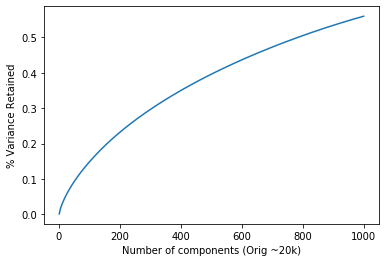

In [9]:
# View retained Variance of each of the new 1000 'features'
# 'explained_variance_ratio' = what percentage each of the 1000 Truncated feautres contributes to the variance
# IF n_components = original # of feaures, explained_variance_ratio.sum() = 1.0
print("TruncatedSVD(from 10k -> 1k) % Variance reatined in the data: \n" + str(p4_truncated_SVD.explained_variance_ratio_.sum()))
print("Plot of of Variance Retained n_components 1 - > 1000: \n")
# Transform 1x1000 array of individual percentages into cumulative percentages
p4_variance_running_sum = p4_truncated_SVD.explained_variance_ratio_.cumsum()
print("Running total of Variance: \n" + str(p4_variance_running_sum[1:10]))
print("\n\n" + '-'*40 + "\n\n")

plt.ylabel("% Variance Retained")
plt.xlabel("Number of components (Orig ~20k)")
plt.plot(range(1,1001),p4_variance_running_sum) 

## Problem 5

In [14]:
######################
## Compare SVD/NFM  ##
######################
# Evalute Different Values of r/n_components
p5_r_values = [ 1, 2, 3, 5, 10, 20, 50, 100, 300 ]

# Plot Statistics Function
def print_5_measure_stats(true_class, prediction):
    homogeneity = metrics.homogeneity_score(true_class, prediction)
    completeness = metrics.completeness_score(true_class, prediction)
    v_measure = metrics.v_measure_score(true_class, prediction)
    adjusted_rand_score = metrics.adjusted_rand_score(true_class, prediction)
    adjusted_mutual_info_score = metrics.adjusted_mutual_info_score(true_class, prediction)

    print("\n Homogeneity: \n" + str(homogeneity))
    print("\n Completness: \n" + str(completeness))
    print("\n V-Measure: \n" + str(v_measure))
    print("\n Adjusted Rand Score: \n" + str(adjusted_rand_score))
    print("\n Adjusted Mutual Score: \n" + str(adjusted_mutual_info_score))
    print("\n\n" + '-'*40 + "\n\n")


In [15]:
#########
## SVD ##
#########
# Fit/Transform initial SVD Matrix (max value of r = 300)
p5_truncated_SVD = TruncatedSVD(n_components=300,random_state=0).fit_transform(p1_tfidf)

# This loop takes the above fitted&transformed (r=300) 'p5_truncated_SVD' matrix and slices the returned array for different values of 'r'
# E.G: p5_truncated_SVD[:,0:100] will only consider the first 100 'r' features (out of 300)
# This prevents us from fit_trasnforming 9 TruncatedSVD()s
for r_values in p5_r_values:
    p5_SVD_kmeans_prediction = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0).fit_predict(p5_truncated_SVD[:,0:r_values])
    print("Trunacted SVD Metrics for r = " + str(r_values))
    print_5_measure_stats(data_true_class,p5_SVD_kmeans_prediction)

Trunacted SVD Metrics for r = 1

 Homogeneity: 
0.0003003030178761853

 Completness: 
0.0003047688479979988

 V-Measure: 
0.0003025194525487269

 Adjusted Rand Score: 
0.00033904080274629444

 Adjusted Mutual Score: 
0.00021032082455310603


----------------------------------------


Trunacted SVD Metrics for r = 2

 Homogeneity: 
0.6014340442975874

 Completness: 
0.6019339649761768

 V-Measure: 
0.6016839007947146

 Adjusted Rand Score: 
0.7053750775537572

 Adjusted Mutual Score: 
0.6016474196828525


----------------------------------------


Trunacted SVD Metrics for r = 3

 Homogeneity: 
0.4057445276826228

 Completness: 
0.4426353531763369

 V-Measure: 
0.4233878628246751

 Adjusted Rand Score: 
0.4029791604137227

 Adjusted Mutual Score: 
0.423332776345533


----------------------------------------


Trunacted SVD Metrics for r = 5

 Homogeneity: 
0.22169446004255983

 Completness: 
0.30996400619493775

 V-Measure: 
0.25850167861455114

 Adjusted Rand Score: 
0.1451558392154968

In [16]:
#########
## NMF ##
#########
# Loop through 
p5_NMF = NMF(n_components=300, random_state=0).fit_transform(p1_tfidf)

# Onle include 'r' feaures in the matrix; use python list slicing
for r_values in p5_r_values:
    p5_SVD_kmeans_prediction = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0).fit_predict(p5_truncated_SVD[:,0:r_values])
    print("Trunacted SVD Metrics for r = " + str(r_values))
    print_5_measure_stats(data_true_class,p5_SVD_kmeans_prediction)

Trunacted SVD Metrics for r = 1

 Homogeneity: 
0.0003003030178761853

 Completness: 
0.0003047688479979988

 V-Measure: 
0.0003025194525487269

 Adjusted Rand Score: 
0.00033904080274629444

 Adjusted Mutual Score: 
0.00021032082455310603


----------------------------------------


Trunacted SVD Metrics for r = 2

 Homogeneity: 
0.6014340442975874

 Completness: 
0.6019339649761768

 V-Measure: 
0.6016839007947146

 Adjusted Rand Score: 
0.7053750775537572

 Adjusted Mutual Score: 
0.6016474196828525


----------------------------------------


Trunacted SVD Metrics for r = 3

 Homogeneity: 
0.4057445276826228

 Completness: 
0.4426353531763369

 V-Measure: 
0.4233878628246751

 Adjusted Rand Score: 
0.4029791604137227

 Adjusted Mutual Score: 
0.423332776345533


----------------------------------------


Trunacted SVD Metrics for r = 5

 Homogeneity: 
0.22169446004255983

 Completness: 
0.30996400619493775

 V-Measure: 
0.25850167861455114

 Adjusted Rand Score: 
0.1451558392154968

## Problem 6

Answer in Report

## Problem 7

In [17]:
###########################################
## Visualize Optimal Clustering: SVD/NMF ##
###########################################
# Optimal SVD value r=2
p7_optimal_SVD = TruncatedSVD(n_components=2,random_state=0).fit_transform(p1_tfidf)
p7_optimal_SVD_kmeans = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0).fit_predict(p7_optimal_SVD)

# Optimal NMF Value r=2
p7_optimal_NMF = NMF(n_components=2, random_state=0).fit_transform(p1_tfidf)
p7_optimal_NMF_kmeans = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0).fit_predict(p7_optimal_NMF)
# Create Scatter Plot Visualization

def Scatterplot(reduced_matrix,k_means_matrix):
    
    # Boolean Mask SVD/NMF Matrix with K-means predicted 0:Computer class
    # SVD/NMF Matrix only has 2 features;
    feature1_class0 = reduced_matrix[k_means_matrix == 0][:, 0]
    feature2_class0 = reduced_matrix[k_means_matrix == 0][:, 1]
    plt.xlabel("SVD/NMF Feature 1")
    plt.ylabel("SVD/NMF Feature 2")
    plt.plot(feature1_class0, feature2_class0, 'c+')
    
    # Boolean Mask SVD/NMF Matrix with K-means predicted 1:Recreation
    feature1_class1 = reduced_matrix[k_means_matrix == 1][:, 0]
    feature2_class1 = reduced_matrix[k_means_matrix == 1][:, 1]
    plt.xlabel("SVD/NMF Feature 1")
    plt.ylabel("SVD/NMF Feature 2")
    plt.plot(feature1_class1, feature2_class1, 'r+')

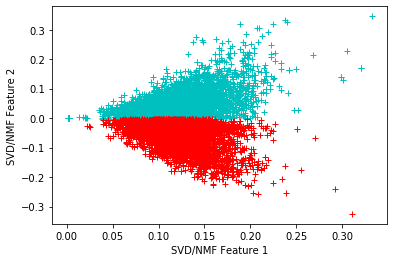

In [18]:
# Plot SVD Values
Scatterplot(p7_optimal_SVD, p7_optimal_SVD_kmeans)

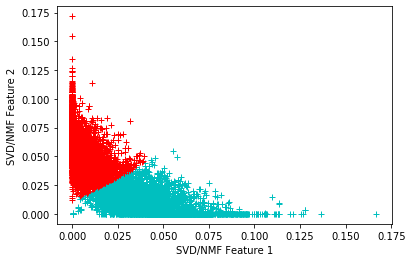

In [19]:
# Plot NMF Values
Scatterplot(p7_optimal_NMF, p7_optimal_NMF_kmeans)

## Problem 8 & 10

In [20]:
##############################
## SVD with/without scaling ##
##############################
# Use Preprocessing Library to remove mean/stdev from SVD matrix (2 feaures)
# Scaling must NOT CENTER data (with_mean=TRUE), may result in negative values
p8_scaled_SVD = preprocessing.scale(p7_optimal_SVD, with_mean=False, with_std=True)
p8_scaled_SVD_Kmeans = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0).fit_predict(p8_scaled_SVD)
p8_not_scaled_SVD = p7_optimal_SVD
p8_not_scaled_SVD_Kmeans = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0).fit_predict(p7_optimal_SVD)

SVD Statisitcs: NO SCALING
Contingency Matrix: 
[[3676  227]
 [ 418 3561]]

 Homogeneity: 
0.5957055666523775

 Completness: 
0.5963140980131192

 V-Measure: 
0.5960096770037602

 Adjusted Rand Score: 
0.6994197092349987

 Adjusted Mutual Score: 
0.595972672680135


----------------------------------------




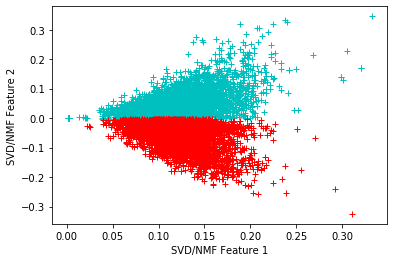

In [21]:
# Evaluate Statistics
print("SVD Statisitcs: NO SCALING")
print("Contingency Matrix: \n" + str(contingency_matrix(data_true_class, p8_not_scaled_SVD_Kmeans)))
print_5_measure_stats(data_true_class,p8_not_scaled_SVD_Kmeans)
Scatterplot(p8_not_scaled_SVD, p8_not_scaled_SVD_Kmeans)

SVD Statisitcs: SCALING
Contingency Matrix: 
[[2194 1709]
 [ 242 3737]]

 Homogeneity: 
0.23551196121234316

 Completness: 
0.2639843545484154

 V-Measure: 
0.2489366632239579

 Adjusted Rand Score: 
0.254881611950386

 Adjusted Mutual Score: 
0.24886398016025116


----------------------------------------




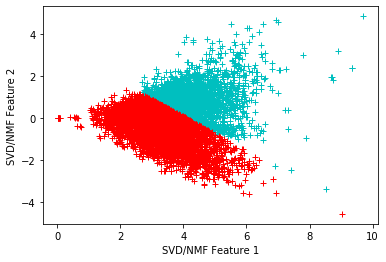

In [22]:
print("SVD Statisitcs: SCALING")
print("Contingency Matrix: \n" + str(contingency_matrix(data_true_class, p8_scaled_SVD_Kmeans)))
print_5_measure_stats(data_true_class,p8_scaled_SVD_Kmeans)
Scatterplot(p8_scaled_SVD, p8_scaled_SVD_Kmeans)

In [23]:
######################################
## NMF: NO LOG with/without scaling ##
######################################
p8_scaled_NMF = preprocessing.scale(p7_optimal_NMF, with_mean=False, with_std=True)
p8_scaled_NMF_Kmeans = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0).fit_predict(p8_scaled_NMF)
p8_not_scaled_NMF = p7_optimal_NMF
p8_not_scaled_NMF_Kmeans = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0).fit_predict(p8_not_scaled_NMF)

NMF Statisitcs: NO SCALING-NO LOG
Contingency Matrix: 
[[  51 2292]
 [1872  517]]

 Homogeneity: 
0.6914586927804408

 Completness: 
0.6914123596005334

 V-Measure: 
0.6914355254142891

 Adjusted Rand Score: 
0.7907472701311208

 Adjusted Mutual Score: 
0.6913884640261887


----------------------------------------




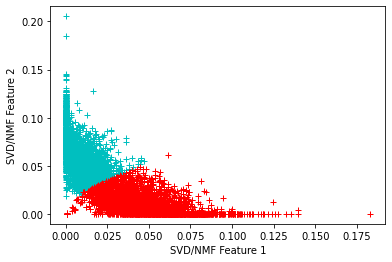

In [20]:
# Evaluate Statistics
print("NMF Statisitcs: NO SCALING-NO LOG")
print("Contingency Matrix: \n" + str(contingency_matrix(data_true_class, p8_not_scaled_SVD_Kmeans)))
print_5_measure_stats(data_true_class,p8_not_scaled_NMF_Kmeans)
Scatterplot(p8_not_scaled_NMF, p8_not_scaled_NMF_Kmeans)

NMF Statisitcs: SCALING-NO LOG
Contingency Matrix: 
[[ 364 3539]
 [3872  107]]

 Homogeneity: 
0.684387226603582

 Completness: 
0.6871211383812941

 V-Measure: 
0.6857514576553903

 Adjusted Rand Score: 
0.7752292094559813

 Adjusted Mutual Score: 
0.6857226307192915


----------------------------------------




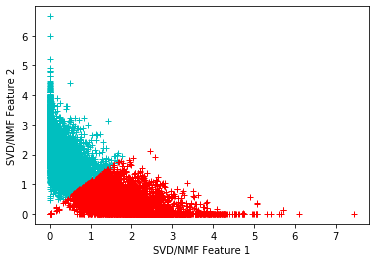

In [27]:
print("NMF Statisitcs: SCALING-NO LOG")
print("Contingency Matrix: \n" + str(contingency_matrix(data_true_class, p8_scaled_NMF_Kmeans)))
print_5_measure_stats(data_true_class,p8_scaled_NMF_Kmeans)
Scatterplot(p8_scaled_NMF, p8_scaled_NMF_Kmeans)

In [45]:
###################################
## NMF: LOG with/without scaling ##
###################################
# Define arbitrary value of epsilon 
epsilon = 0.0001

# From Discussion notes:
def log_function(x, ep=0.0001, base=np.exp(1)):
    return np.sign(x) * (np.log(np.abs(x)+ep)/np.log(base) - np.log(ep)/np.log(base))



# Take log() of NMF matrices
p8_log_not_scaled_NMF = log_function(p8_not_scaled_NMF, epsilon, base=10)
p8_log_scaled_NMF = log_function(p8_scaled_NMF, epsilon, base=10)


In [46]:
# Predict based on log(x+epsilon) function
p8_log_scaled_Kmeans = KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0).fit_predict(p8_log_scaled_NMF)
p8_log_not_scaled_Kmeans= KMeans(n_clusters=2, n_init=30, max_iter=1000, random_state=0).fit_predict(p8_log_not_scaled_NMF)

NMF Statisitcs: NO SCALING - LOG + EPSILON
Contingency Matrix: 
[[3594  309]
 [ 158 3821]]

 Homogeneity: 
0.22881750283889787

 Completness: 
0.3195781202546837

 V-Measure: 
0.26668727597100905

 Adjusted Rand Score: 
0.14768135966795615

 Adjusted Mutual Score: 
0.2666090172878646


----------------------------------------




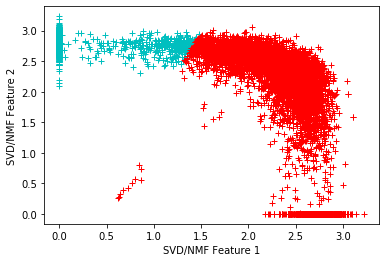

In [47]:
# Evaluate Statistics
print("NMF Statisitcs: NO SCALING - LOG + EPSILON")
print("Contingency Matrix: \n" + str(contingency_matrix(data_true_class, p8_not_scaled_NMF_Kmeans)))
print_5_measure_stats(data_true_class,p8_log_not_scaled_Kmeans)
Scatterplot(p8_log_not_scaled_NMF, p8_log_not_scaled_Kmeans)

NMF Statisitcs: SCALING - LOG + EPSILON
Contingency Matrix: 
[[ 364 3539]
 [3872  107]]

 Homogeneity: 
0.17928156801202375

 Completness: 
0.2827731334791513

 V-Measure: 
0.2194372683502877

 Adjusted Rand Score: 
0.09604512148749679

 Adjusted Mutual Score: 
0.21934978081249248


----------------------------------------




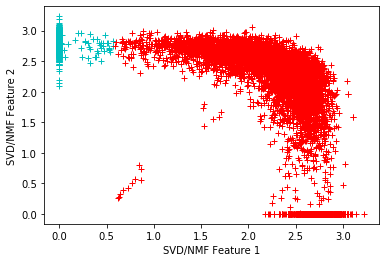

In [48]:
# Evaluate Statistics
print("NMF Statisitcs: SCALING - LOG + EPSILON")
print("Contingency Matrix: \n" + str(contingency_matrix(data_true_class, p8_scaled_NMF_Kmeans)))
print_5_measure_stats(data_true_class,p8_log_scaled_Kmeans)
Scatterplot(p8_log_not_scaled_NMF, p8_log_scaled_Kmeans)

## Problem 9

Answer in Report.